In [123]:
import pandas as pd
import numpy as np

#### Aufgabe 2

In [124]:
df = pd.read_stata(r"K:\Stat_Workshop\Python\Daten\GEDA2014-2015\geda14.dta")

#### Aufgabe 3

Kreuztabelle in absoluten Häufigkeiten

In [125]:
pd.crosstab(df['AKbingeC_k3'], df['sex'], margins = True)

sex,Männlich,Weiblich,All
AKbingeC_k3,,,
Mind. monatlich,2254,1590,3844
Nicht monatlich oder nie,3126,4887,8013
All,5380,6477,11857


Kreuztabelle mit Spaltenprozentuierung

In [126]:
pd.crosstab(df['AKbingeC_k3'], df['sex'], margins = True, normalize = 'columns')*100

sex,Männlich,Weiblich,All
AKbingeC_k3,,,
Mind. monatlich,41.895911,24.548402,32.419668
Nicht monatlich oder nie,58.104089,75.451598,67.580332


#### Aufgabe 4

Kreuztabelle mit Spaltenprozentuierung

In [127]:
pd.crosstab(df['GZmehm1'], df['SDses'], margins = True, normalize = 'columns')*100

SDses,Niedrig,Mittel,Hoch,All
GZmehm1,,,,
Sehr gut,8.547889,14.551130,22.763480,15.820345
Gut,43.099897,55.306183,59.650735,54.508128
Mittelmäßig,38.053553,25.222949,15.563725,24.669013
Schlecht,8.959835,4.250892,1.868873,4.365678
Sehr schlecht,1.338826,0.668847,0.153186,0.636836


Berechnung von Chi-Quadrat

In [128]:
from scipy.stats import chi2_contingency, contingency

In [129]:
crosstab = pd.crosstab(df['GZmehm1'], df['SDses']) # die Kreuztabelle muss an dieser Stelle in absoluten Häufigkeiten sein!

In [130]:
c, p, dof, expected = chi2_contingency(crosstab)

In [131]:
print('Chi-Quadrat:','{:.3f}'.format(c),'\n','p-Wert:','{:.3f}'.format(p),'\n','Freiheitsgrade:',dof)

Chi-Quadrat: 653.607 
 p-Wert: 0.000 
 Freiheitsgrade: 8


Berechnung von Cramérs *V*

In [132]:
V = contingency.association(crosstab, method = 'cramer')

In [133]:
print('Cramérs V:', '{:.3f}'.format(V))

Cramérs V: 0.165


#### Aufgabe 5

Variablenformat anpassen. Siehe Übungsblatt, Aufgabe 10 für eine kurze Erläuterung.

In [134]:
df['LQzufrB10'] = df['LQzufrB10'].cat.codes
df['LQzufrB10'] = df['LQzufrB10'].replace(-1, np.NaN)

Streudiagramm

<AxesSubplot:xlabel='SDses_score', ylabel='LQzufrB10'>

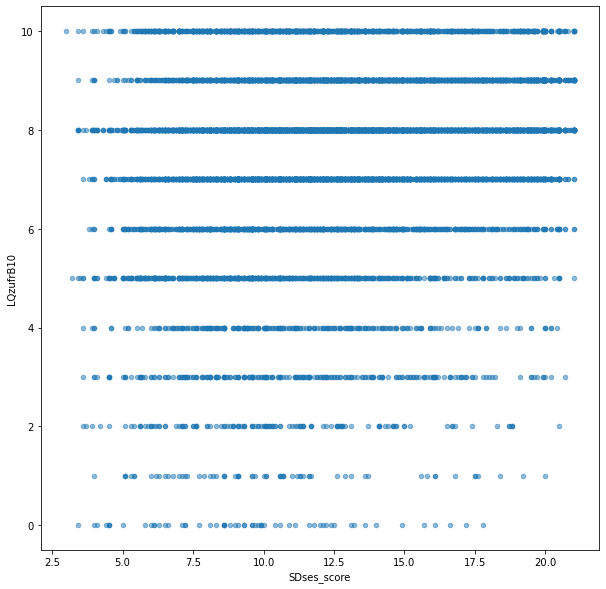

In [135]:
df.plot.scatter(x = 'SDses_score', y = 'LQzufrB10', marker = 'o',  alpha=0.5, figsize = (10,10))

Kovarianz

In [136]:
df['SDses_score'].cov(df['LQzufrB10'])

1.2886843838468474

Maximal mögliche Kovarianz

In [137]:
df['SDses_score'].std()*df['LQzufrB10'].std()

7.339278779571173

Kovarianz/Maximum = Korrelation

In [138]:
df['SDses_score'].cov(df['LQzufrB10'])/(df['SDses_score'].std()*df['LQzufrB10'].std())

0.17558733256377868

Korrelation

In [139]:
df['SDses_score'].corr(df['LQzufrB10'])

0.17561918720888353